In [19]:
! pip install ucimlrepo -q

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
import utils.plots as plots

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
RANDOM_STATE = 51

## 2. Base de Dados



In [21]:
eeg_eye_state = fetch_ucirepo(id=264) 

X = eeg_eye_state.data.features 
y = eeg_eye_state.data.targets 

In [22]:
X.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000


In [23]:
# ANÁLISE EXPLORATÓRIA COMPLETA DO DATASET EEG EYE STATE
print("="*70)
print("ANÁLISE EXPLORATÓRIA - EEG EYE STATE DATASET")
print("="*70)

# 1. Informações básicas sobre o dataset
print("\n1. INFORMAÇÕES GERAIS:")
print(f"Número de instâncias: {X.shape[0]}")
print(f"Número de atributos (features): {X.shape[1]}")
print(f"Shape das features (X): {X.shape}")
print(f"Shape do target (y): {y.shape}")


ANÁLISE EXPLORATÓRIA - EEG EYE STATE DATASET

1. INFORMAÇÕES GERAIS:
Número de instâncias: 14980
Número de atributos (features): 14
Shape das features (X): (14980, 14)
Shape do target (y): (14980, 1)


In [24]:

# 2. Informações detalhadas sobre as features
print(f"\n2. INFORMAÇÕES SOBRE AS FEATURES:")
X.info()


2. INFORMAÇÕES SOBRE AS FEATURES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     14980 non-null  float64
 1   F7      14980 non-null  float64
 2   F3      14980 non-null  float64
 3   FC5     14980 non-null  float64
 4   T7      14980 non-null  float64
 5   P7      14980 non-null  float64
 6   O1      14980 non-null  float64
 7   O2      14980 non-null  float64
 8   P8      14980 non-null  float64
 9   T8      14980 non-null  float64
 10  FC6     14980 non-null  float64
 11  F4      14980 non-null  float64
 12  F8      14980 non-null  float64
 13  AF4     14980 non-null  float64
dtypes: float64(14)
memory usage: 1.6 MB


In [25]:

# 3. Análise do target (balanceamento das classes)
print(f"\n3. ANÁLISE DO TARGET:")
print(f"Tipo de dados do target: {y.dtypes}")
print(f"Classes únicas: {sorted(y.iloc[:,0].unique())}")
print(f"Distribuição das classes:")
distribuicao_classes = y.iloc[:,0].value_counts().sort_index()
print(distribuicao_classes)

# Calculando percentuais
percentuais = (distribuicao_classes / len(y) * 100).round(2)
print(f"\nPercentual por classe:")
for classe, perc in percentuais.items():
    print(f"Classe {classe}: {perc}%")

# Verificando balanceamento
ratio = min(distribuicao_classes) / max(distribuicao_classes)

print(f"\nRatio de balanceamento: {ratio:.3f}")



3. ANÁLISE DO TARGET:
Tipo de dados do target: eyeDetection    int64
dtype: object
Classes únicas: [0, 1]
Distribuição das classes:
eyeDetection
0    8257
1    6723
Name: count, dtype: int64

Percentual por classe:
Classe 0: 55.12%
Classe 1: 44.88%

Ratio de balanceamento: 0.814


In [26]:

# 4. Verificação de dados ausentes e estatísticas básicas
print(f"\n4. QUALIDADE DOS DADOS:")
print(f"Valores ausentes nas features: {X.isnull().sum().sum()}")
print(f"Valores ausentes no target: {y.isnull().sum().sum()}")
print(f"Duplicatas: {X.duplicated().sum()}")


4. QUALIDADE DOS DADOS:
Valores ausentes nas features: 0
Valores ausentes no target: 0
Duplicatas: 0


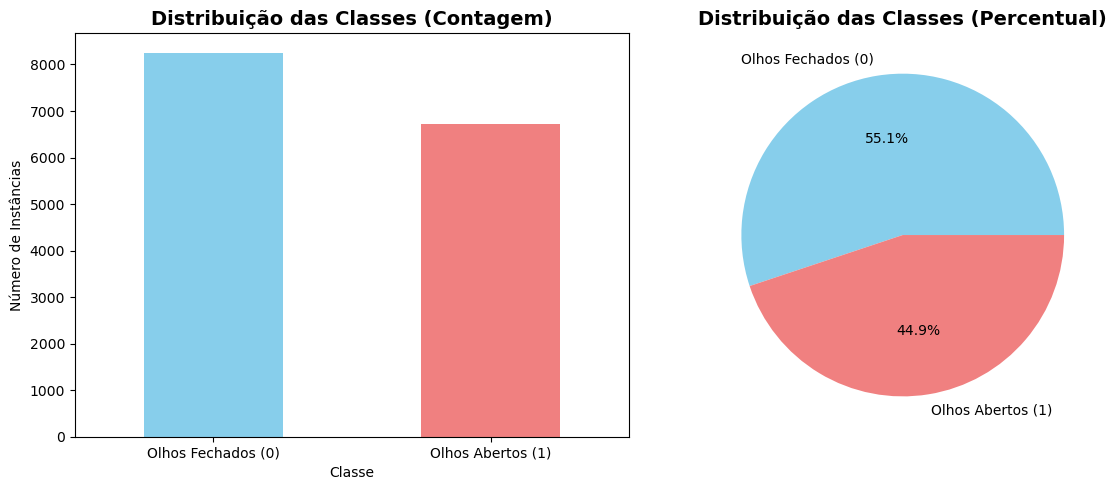

In [27]:

# VISUALIZAÇÕES

# 1. Distribuição das classes
plots.plot_distribuicao_classes(distribuicao_classes)

📊 RESULTADO DA FILTRAGEM (Range: 3000 - 6000)
Dataset original: 14980 observações
Dataset filtrado: 14976 observações
Linhas removidas: 4 (0.03%)
Linhas mantidas: 99.97%


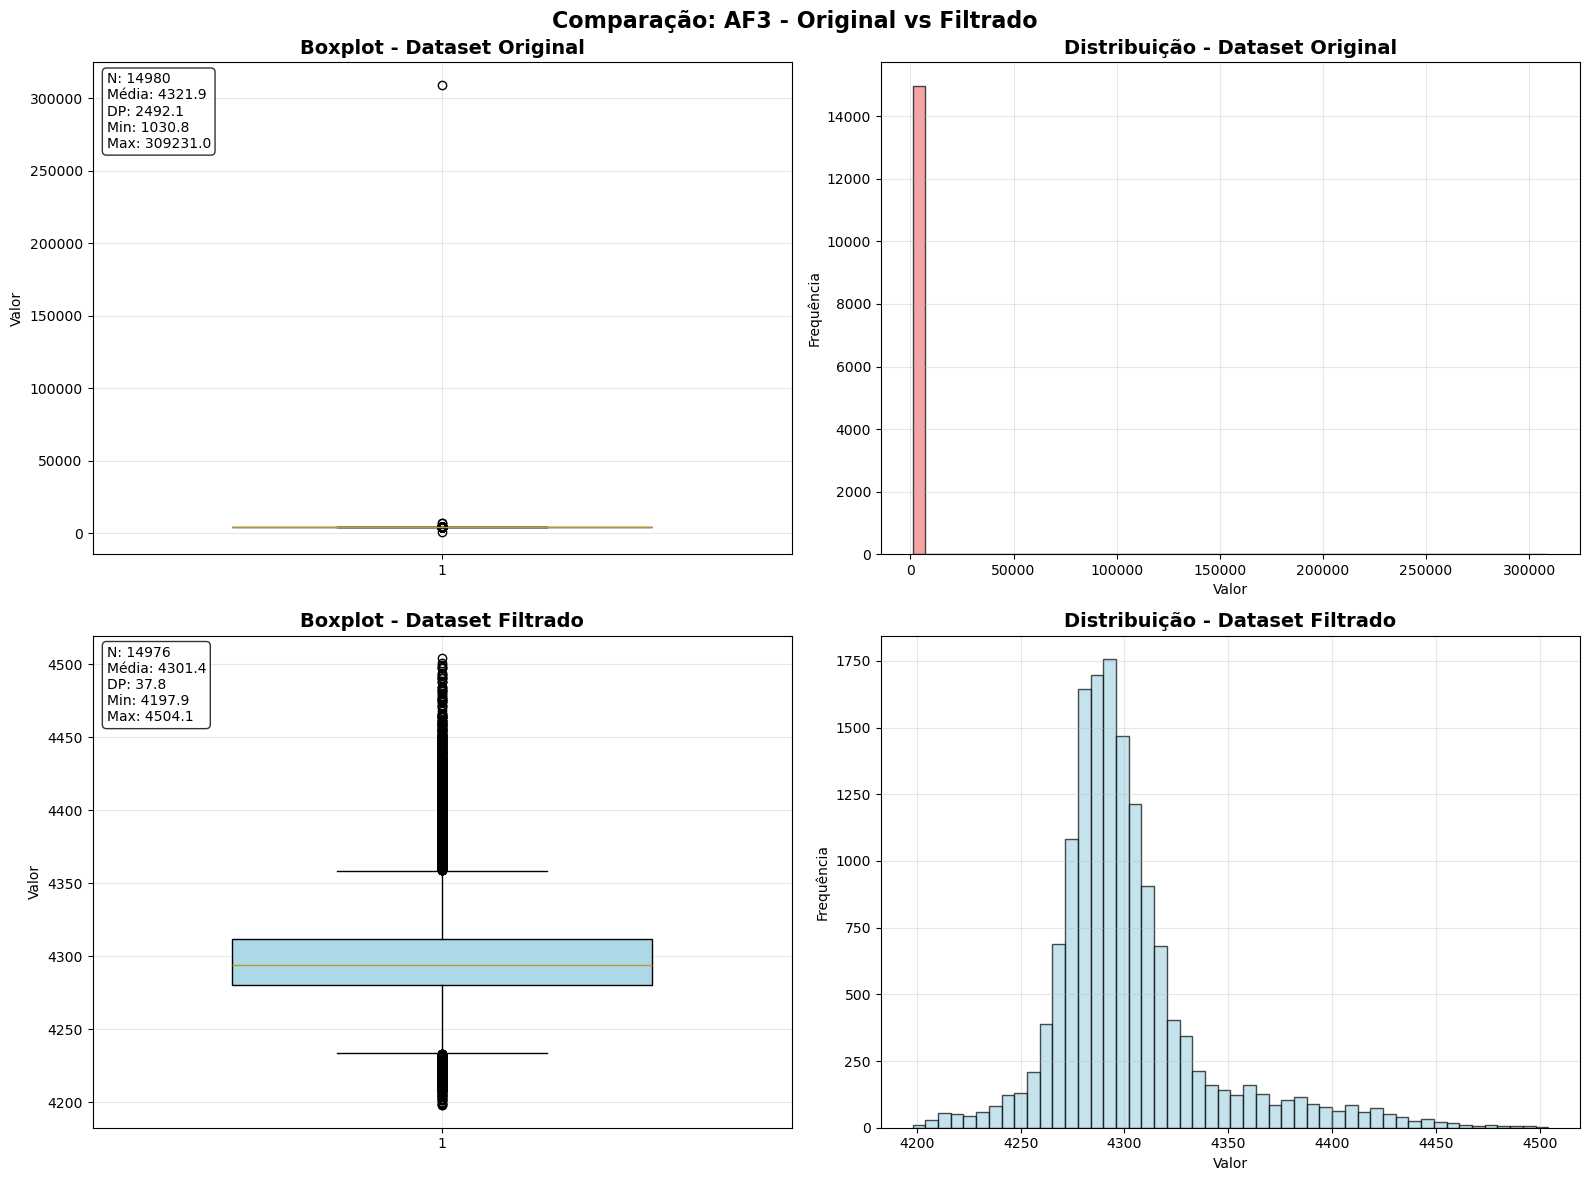


📈 RESUMO COMPARATIVO - AF3
Métrica              Original     Filtrado     Melhoria  
Observações          14980        14976        -         
Média                4321.92      4301.38      20.54     
Desvio Padrão        2492.07      37.77        2454.30   
Mínimo               1030.77      4197.95      -         
Máximo               309231.00    4504.10      -         
Melhoria DP (%)      -            -            98.5      


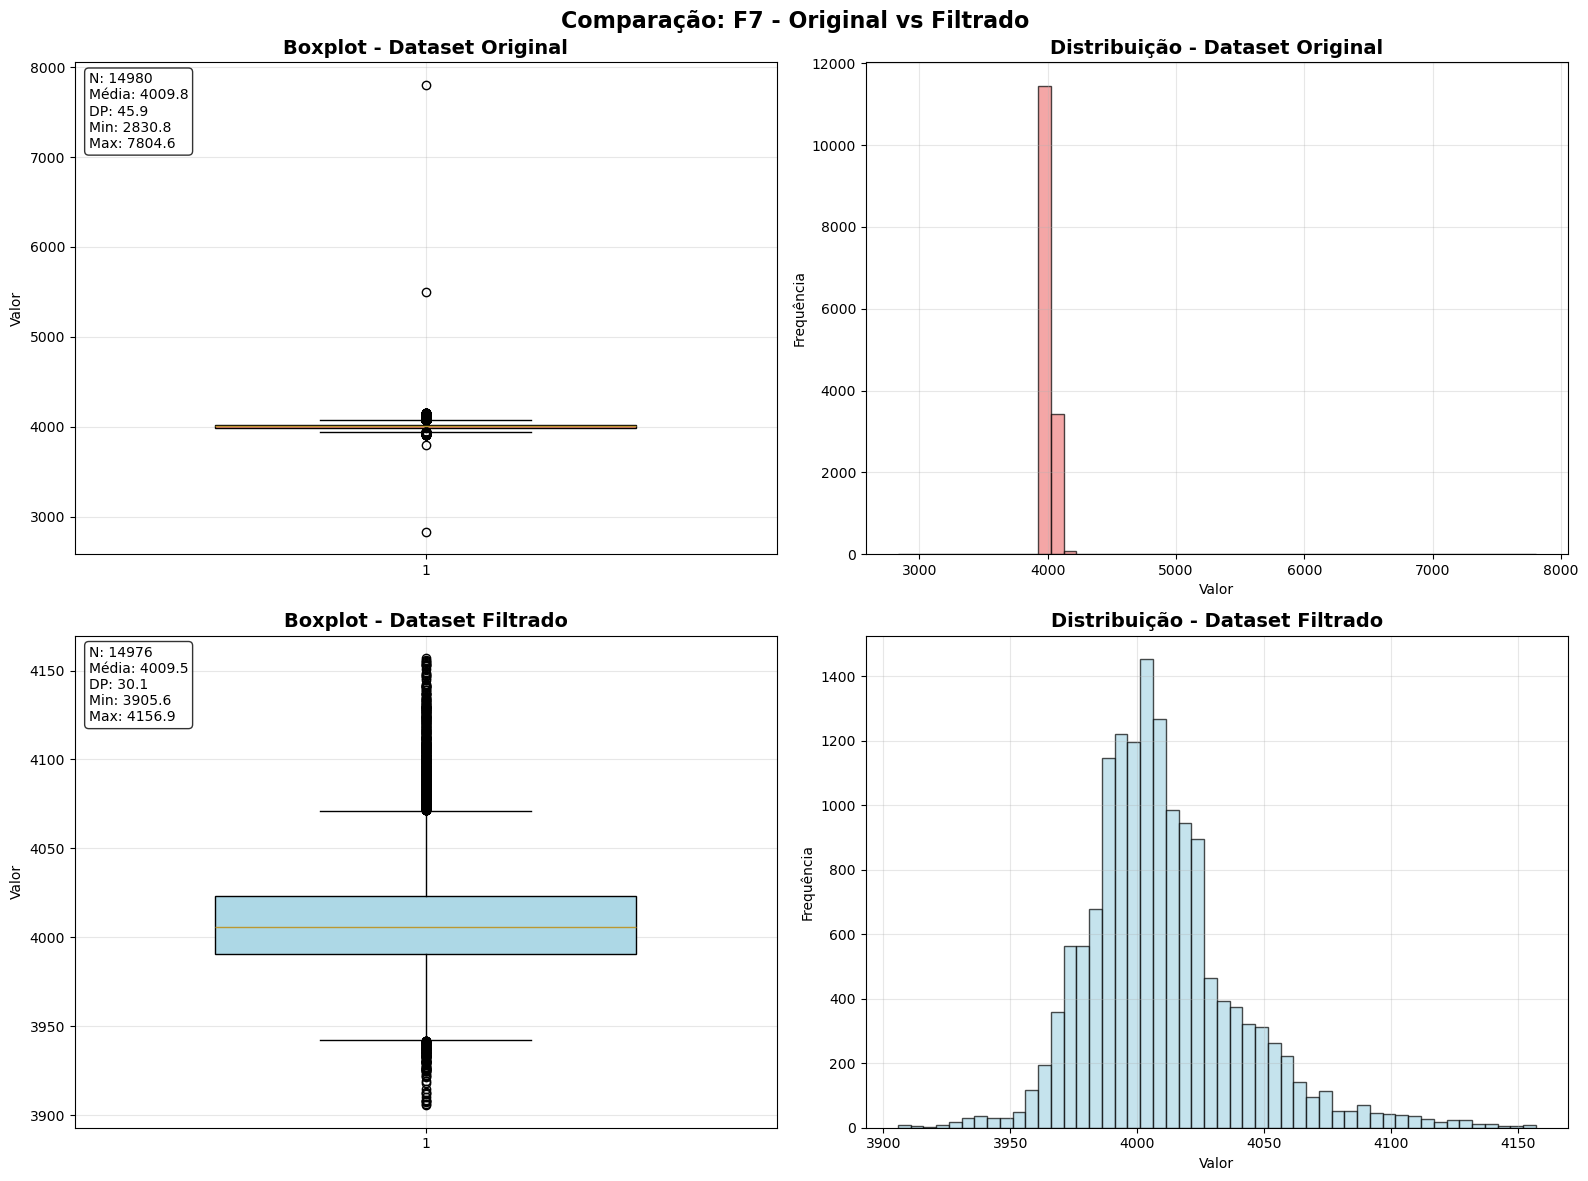


📈 RESUMO COMPARATIVO - F7
Métrica              Original     Filtrado     Melhoria  
Observações          14980        14976        -         
Média                4009.77      4009.51      0.26      
Desvio Padrão        45.94        30.09        15.85     
Mínimo               2830.77      3905.64      -         
Máximo               7804.62      4156.92      -         
Melhoria DP (%)      -            -            34.5      


In [28]:
from utils import filtrar_por_range

# 1. Filtrar dataset com range 4000-5000
X_filtrado, y_filtrado = filtrar_por_range(3000, 6000, X, y)

# 2. Plotar comparação para as primeiras 3 features
features_exemplo = X.columns

for feature in features_exemplo[:2]:
    plots.plotar_comparacao_feature(feature, X, y, X_filtrado, y_filtrado)

## 3.Preparação dos Dados

In [29]:
X, y = filtrar_por_range(3000, 6000, X, y)

📊 RESULTADO DA FILTRAGEM (Range: 3000 - 6000)
Dataset original: 14980 observações
Dataset filtrado: 14976 observações
Linhas removidas: 4 (0.03%)
Linhas mantidas: 99.97%


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# 2. Normalizar apenas as features (X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from tqdm.auto import tqdm  # Importando tqdm para as barras de progresso

def busca_hiperparametros(estimator, params, metric='accuracy'):
    """
    Realiza 20 iterações do RandomizedSearchCV com random state variando a cada iteração.
    Armazena as métricas e retorna os melhores parâmetros.
    """
    resultados = []
    melhores_parametros = []
    melhores_modelos = []
    
    for i in tqdm(range(20), desc="Buscando Hiperparâmetros"):  # Barra de progresso para 20 iterações
        randomized_search = RandomizedSearchCV(
            estimator,
            param_distributions=params,
            n_iter=10,
            scoring=metric,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE + i),
            random_state=RANDOM_STATE + i,
            n_jobs=-1
        )
        randomized_search.fit(X_train, y_train)
        resultados.append(randomized_search.cv_results_)
        melhores_parametros.append(randomized_search.best_params_)
        melhores_modelos.append(randomized_search.best_estimator_)
    
    # Organizando os resultados de todas as iterações
    resultados_finais = pd.DataFrame(resultados[0])
    for i in range(1, len(resultados)):
        resultados_finais = pd.concat([resultados_finais, pd.DataFrame(resultados[i])], ignore_index=True)
    
    # Frequência dos melhores parâmetros
    parametros_frequentes = pd.Series([str(params) for params in melhores_parametros]).value_counts().head(10)
    
    # Considerando apenas as colunas numéricas para calcular a média e o desvio padrão
    colunas_numericas = resultados_finais.select_dtypes(include=[np.number]).columns
    medias = resultados_finais[colunas_numericas].mean(axis=0)
    desvio_padrao = resultados_finais[colunas_numericas].std(axis=0)

    return medias, desvio_padrao, parametros_frequentes, melhores_modelos

from sklearn.model_selection import StratifiedKFold, KFold, ShuffleSplit


def treinamento_progressivo(best_model):
    acuracia_treino = []
    precisao_treino = []
    recall_treino = []
    f1_treino = []
    acuracia_teste = []
    precisao_teste = []
    recall_teste = []
    f1_teste = []
    
    for i in tqdm(range(1, 21), desc="Treinamento Progressivo"):  # Barra de progresso para o treinamento progressivo
        X_treino_parcial = X_train[:int(0.05 * i * len(X_train))]
        y_treino_parcial = y_train[:int(0.05 * i * len(y_train))]
        
        best_model.fit(X_treino_parcial, y_treino_parcial)
        
        y_pred_treino = best_model.predict(X_treino_parcial)
        y_pred_teste = best_model.predict(X_test)
        
        acuracia_treino.append(accuracy_score(y_treino_parcial, y_pred_treino))
        precisao_treino.append(precision_score(y_treino_parcial, y_pred_treino))
        recall_treino.append(recall_score(y_treino_parcial, y_pred_treino))
        f1_treino.append(f1_score(y_treino_parcial, y_pred_treino))
        
        acuracia_teste.append(accuracy_score(y_test, y_pred_teste))
        precisao_teste.append(precision_score(y_test, y_pred_teste))
        recall_teste.append(recall_score(y_test, y_pred_teste))
        f1_teste.append(f1_score(y_test, y_pred_teste))
    
    plots.plot_progressive_training_progress(
        acuracia_treino, precisao_treino, recall_treino, f1_treino,
        acuracia_teste, precisao_teste, recall_teste, f1_teste
    )
    
    plots.plot_metrics_comparison(best_model, X_test, y_test)
        
params_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [32]:
# Chamada para a função de busca de hiperparâmetros
# Substitua X_train, y_train, X_test, y_test pelos seus dados
medias, desvio_padrao, parametros_frequentes, resultados = busca_hiperparametros(DecisionTreeClassifier(), params_dt, metric='accuracy')



Buscando Hiperparâmetros:   0%|          | 0/20 [00:00<?, ?it/s]

In [37]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from tqdm.auto import tqdm
import numpy as np

def escolher_melhor_modelo(melhores_modelos, X_train, y_train, metric='accuracy'):
    """
    Realiza a segunda validação cruzada k-fold (5) nos 20 melhores modelos para escolher o melhor modelo
    baseado na estabilidade e métrica principal.
    """
    melhor_modelo = None
    melhor_media = -np.inf
    menor_desvio = np.inf
    
    # Verifique os valores únicos em y_train
    print(f"Valores únicos em y_train: {np.unique(y_train)}")

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    
    # Validação cruzada nos 20 melhores modelos
    for modelo in tqdm(melhores_modelos, desc="Validando Melhores Modelos"):  # Barra de progresso para validação dos melhores modelos
        scores = cross_val_score(modelo, X_train, y_train, cv=cv, scoring=metric)
        media_score = np.mean(scores)
        desvio_score = np.std(scores)
        
        # Escolher o modelo com melhor média e menor desvio padrão
        if media_score > melhor_media or (media_score == melhor_media and desvio_score < menor_desvio):
            melhor_modelo = modelo
            melhor_media = media_score
            menor_desvio = desvio_score
    
    return melhor_modelo


Valores únicos em y_train: [0 1]


Validando Melhores Modelos:   0%|          | 0/20 [00:00<?, ?it/s]

Treinamento Progressivo:   0%|          | 0/20 [00:00<?, ?it/s]

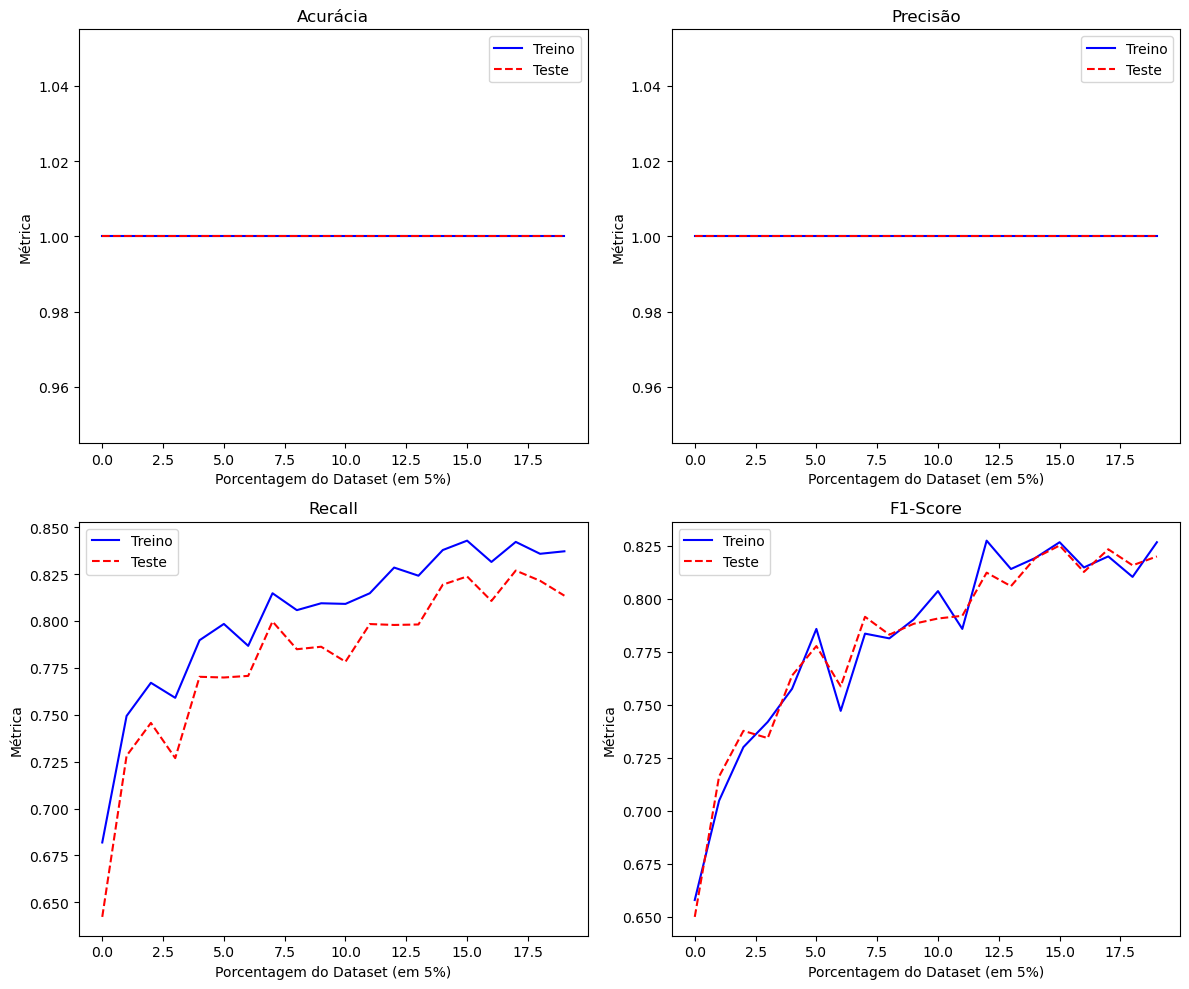

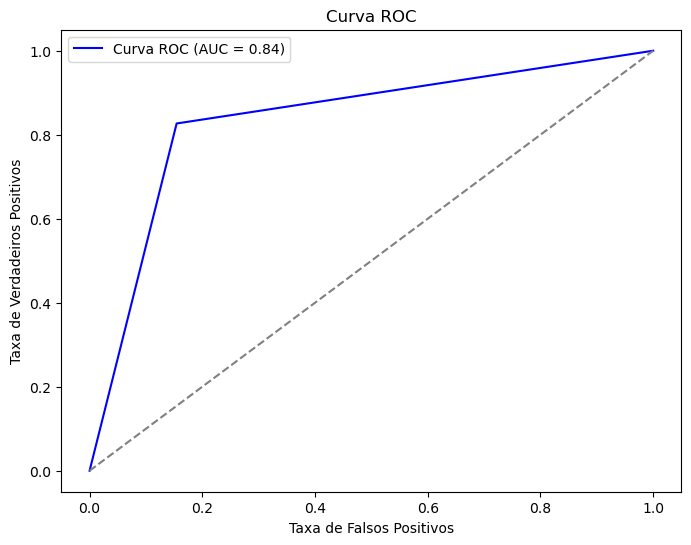

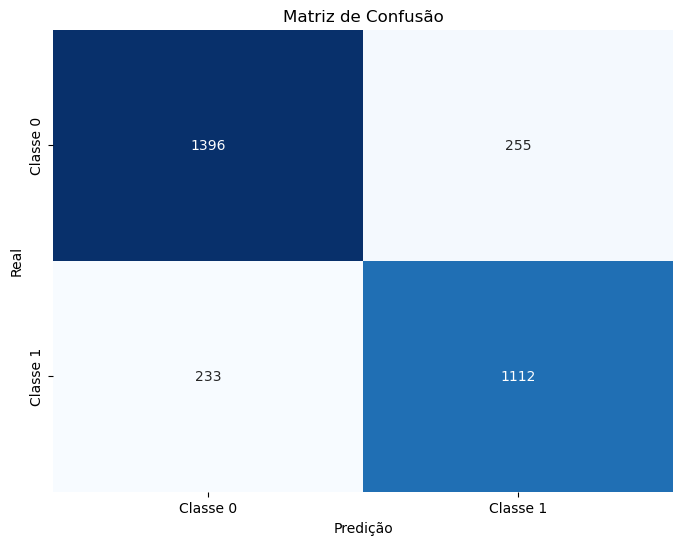

In [ ]:

melhor_modelo = escolher_melhor_modelo(resultados, X_train, y_train , metric='accuracy')


Treinamento Progressivo:   0%|          | 0/20 [00:00<?, ?it/s]

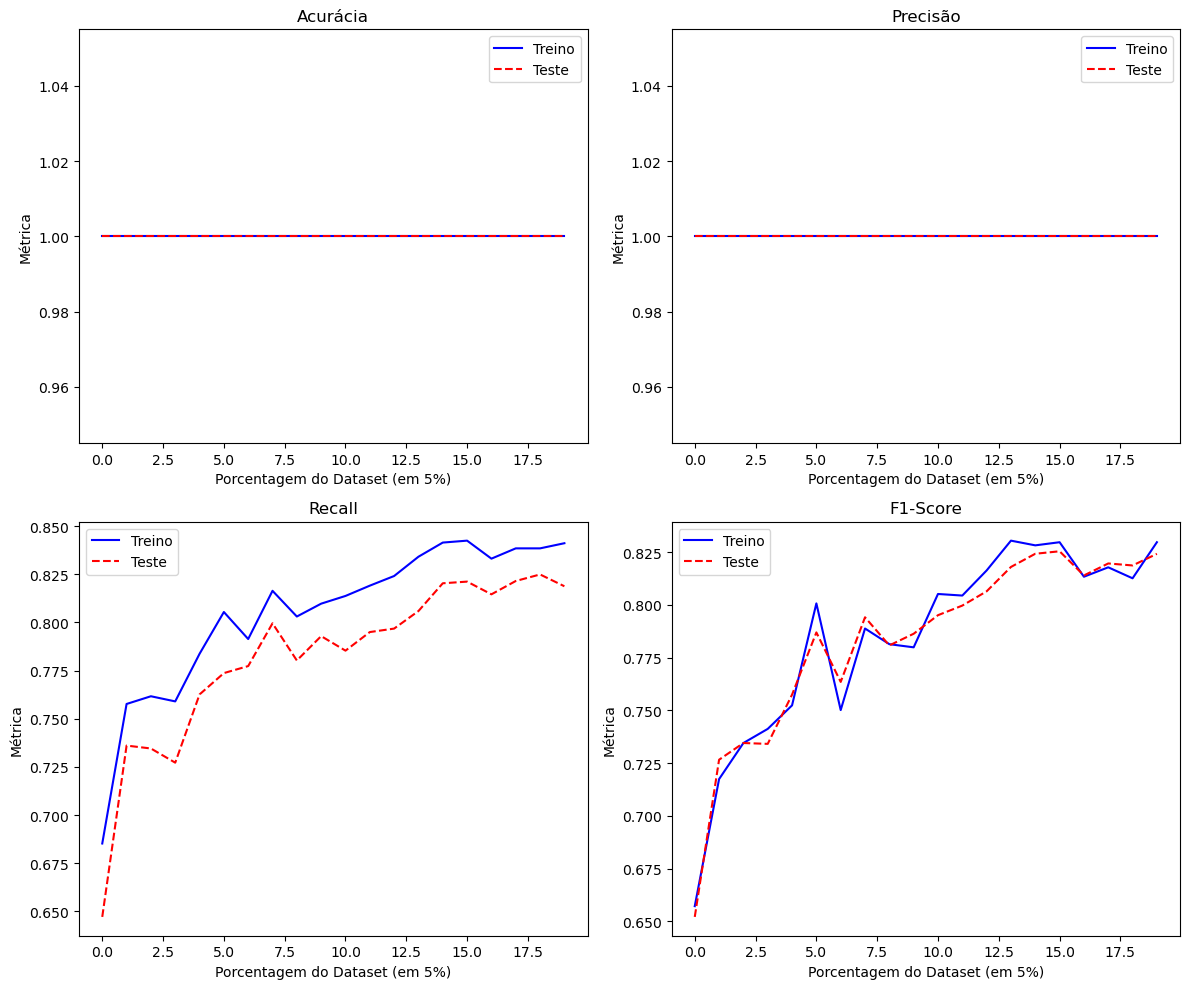

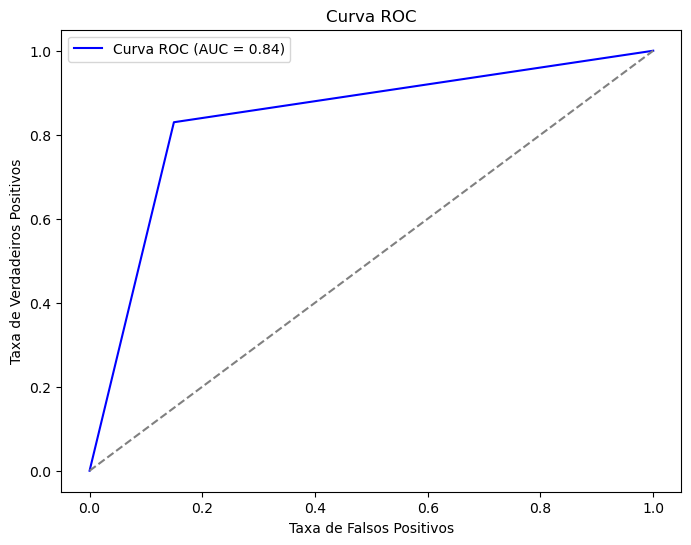

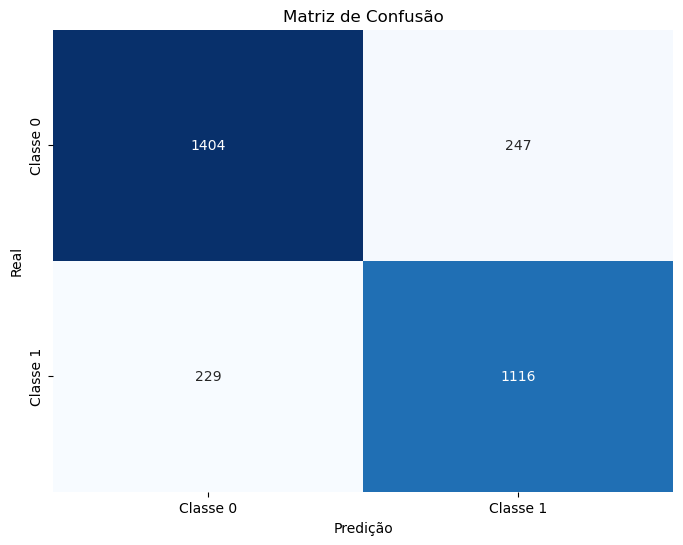

In [39]:
treinamento_progressivo(melhor_modelo)

In [ ]:
# Verifique os valores únicos em y_train
print("Valores únicos em y_train:", np.unique(y_train))


Valores únicos em y_train: [0 1]
